# Lab03 - Clustering

## Yêu cầu bài tập

**Cách làm bài**


- Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm. **Không được sửa những chỗ không có** `TODO`.

- Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

- Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

- Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`) và ấn Ctrl+S để lưu lại.

**Nội dung bài tập**

Trong bài này, bạn sẽ cài đặt 2 thuật toán `k-means` và `k-medois` để gom nhóm dữ liệu. 

## Import thư viện 

In [168]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Cài đặt thuật toán K-mean

Tính khoảng cách euclid giữa 2 điểm dữ liệu x, y

In [169]:
def euclidianDistance(x, y):
    '''
    Euclidian distance between x, y
    --------
    Return
    d: float
    '''
    #TODO
    return np.sqrt(np.sum((np.array(x) - np.array(y))**2))


In [170]:
class k_means:  
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''

 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1, self.k)
        self.centroids=X[indexes]
            
        
    def updateCentroids(self, cur_centroids):
        '''
        Class constructor
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        
        for c in range(0,self.k):
            prev_centroid = self.centroids[c]
            cur_centroid  = cur_centroids[c]
            #checking if % of difference between old position and new position is more than thresold
            
            #TODO d=?
            d = sum([abs((i - j) / i) for i, j in zip(prev_centroid, cur_centroid)])
            
            
            if  d > self.thresold:
                self.has_converged = False
                self.centroids = cur_centroids
            
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    c = np.argmin(d_list)

                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #New centroids of each cluster is calculated by mean of all samples closest to it
                
                #TODO (new_centroid=???)
                new_centroid = [np.mean(i) for i in zip(*samples)]
            
                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(data[i], self.centroids[j]))
                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO 
            pred.append(np.argmin(d_list))
            
        return np.array(pred)

## Chạy thuật toán 

**Khởi tạo dữ liệu**

Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.

In [171]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

**Hiển thị dữ liệu trên đồ thị**

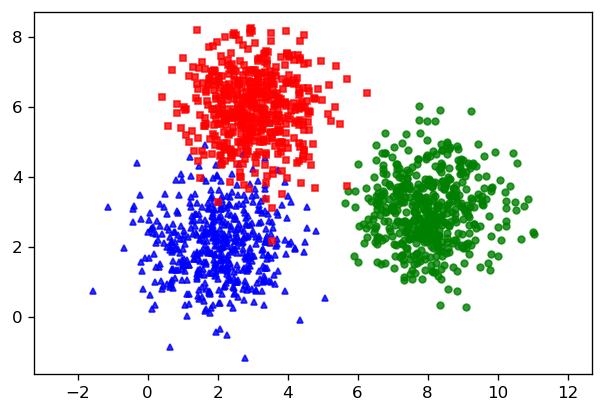

In [172]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

**Gom nhóm dữ liệu bằng thuật toán k-means mà bạn vừa cài đặt**

Centers found by your model:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


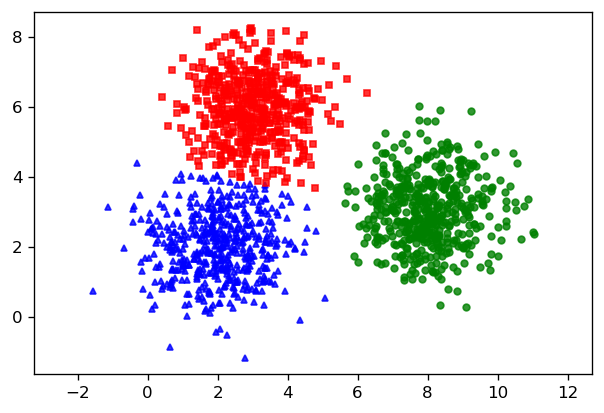

In [173]:
model1=k_means(k=3)
print('Centers found by your model:')
print(model1.fit(X))

pred=model1.predict(X)

visualize(X,pred)


**Thử lại kết quả với scikit learn**

Centers found by scikit-learn:
[[8.02344787 3.061206  ]
 [3.01440769 5.96971345]
 [2.01380571 2.02688416]]


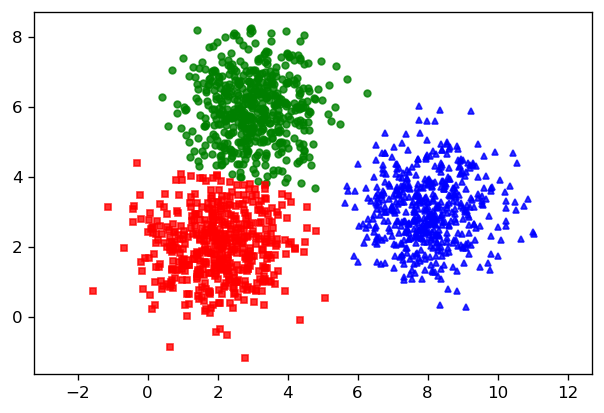

In [174]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

## 2. Cài đặt thuật toán K-medoids

Các bạn cài đặt và thử nghiệm thuật toán K-medoids tương tự như phần 1

In [175]:
#K-medoids Implementation
#TODO 
from random import choice, sample

def distanceMatrix(a):
    D = a.reshape(a.shape[0],-1,a.shape[1])-a
    return np.linalg.norm(D,axis=2)

def calcCost(cur_medoid, D):
    return np.sum(np.sort(D[cur_medoid],axis=0)[0])

class k_medoids:  
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times medoids will move
        - has_converged: to check if the algorithm stop or not
        '''
 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initMedoids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1,self.k)
        return indexes

    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster medoids
        
        D = distanceMatrix(X)
        self.medoids= np.array(self.initMedoids(X))
        
        #Main loop
        for i in range(self.max_iter):
            
            prev_medoids = np.copy(self.medoids)
            non_medoids = np.delete(np.arange(len(D)), self.medoids)
            
            best_cost = calcCost(self.medoids, D)
            print(best_cost)
            best_combination = None
            
            for m in self.medoids:
                for o in non_medoids:
                    self.medoids[self.medoids == m] = o
                    
                    new_cost = calcCost(self.medoids, D)
                    
                    if new_cost < best_cost:
                        best_cost = new_cost
                        best_combination = m, o
                    
                    self.medoids[self.medoids == o] = m
            
            if best_combination is not None:
                m, o = best_combination
                self.medoids[self.medoids == m] = o
                
            if np.all(prev_medoids == self.medoids):
                break
            
        #Each cluster represented by its medoid
        return np.array(X[self.medoids])

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between medoids and data sample
            d_list = []
            for j in range(len(self.medoids)):
                
                # Calculate distances between current data sample and medoid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(data[i], data[self.medoids[j]]))
                
            # Store the Cluster has minimal distance between its medoid and current data sample to pred
            #TODO 
            pred.append(np.argmin(d_list))
            
        return np.array(pred)

**Hiển thị dữ liệu trên đồ thị**

Centers found by your model:
2965.487057095473
2056.1424134180916
1872.9217937687308
[[7.94165544 3.01614348]
 [3.08408133 6.06002664]
 [1.91190538 1.98261014]]


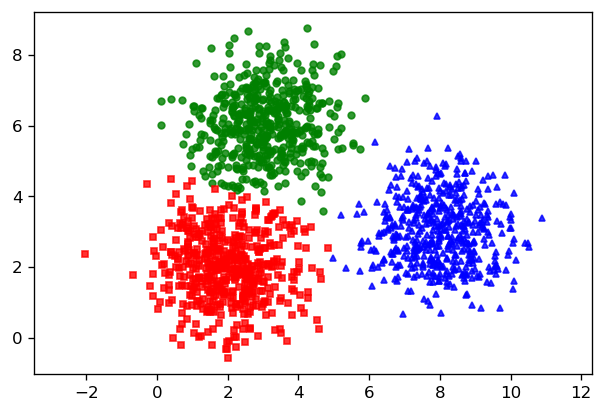

In [176]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

model2=k_medoids(k=3, max_iter=10)
print('Centers found by your model:')
print(model2.fit(X))

pred=model2.predict(X)

visualize(X,pred)

**Thử lại kết quả với scikit learn**

In [177]:
%pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


Centers found by scikit-learn:
[[3.08408133 6.06002664]
 [1.91190538 1.98261014]
 [8.03915622 3.07130725]]


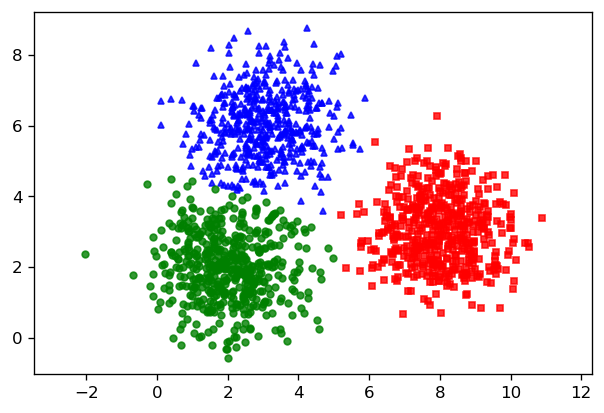

In [178]:
from sklearn_extra.cluster import KMedoids
model2 = KMedoids(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

**Nêu điểm khác biệt giữa thuật toán K-means và K-medoids:**

TODO: 
* ***K-means*** chọn **các điểm trong không gian** làm *centroids*, trong khi ***K-medoids*** chọn **chính các mẫu dữ liệu** để làm việc đó.
* ***K-medoids*** (Alternative) có tính ngẫu nhiên **cao hơn** so với ***K-means***.
  * Cả hai thuật toán đều chọn ngẫu nhiên các *centroids* ban đầu.
  * Trong khâu lấy các *centroid* mới:
    * ***K-means*** sử dụng phương pháp tính trung bình cộng.
    * ***K-medoids*** chọn ngẫu nhiên một mẫu trong cụm.
  * Với tập dữ liệu lớn, khả năng lệch khỏi tâm cụm của ***K-medoids*** sẽ **tương đối cao** và sẽ **gây nhiều đột biến hơn**.
  * Ngược lại, phương pháp trung bình cộng khiến cho ***K-means*** dễ **nhạy cảm với các mẫu nhiễu**, vốn dễ xuất hiện ở các tập dữ liệu nhỏ, dẫn đến các trường hợp chắc chắn gây lệch tâm.
* ***K-medoids*** chạy trong $O(n^2kt)$, so với ***K-means*** trong $O(nkt)$<sub>(theo: [scikit-learn](https://scikit-learn-extra.readthedocs.io/en/stable/modules/cluster.html#:~:text=The%20complexity%20of%20K%2DMedoids,O%20(%20N%20K%20T%20)%20.))</sub>, với:
  * $n$: số phần tử
  * $k$: số *centroids*
  * $t$: số vòng lặp  
Như vậy, ***K-medoids*** chỉ thích hợp với các bài toán có tập dữ liệu nhỏ.
* ***K-means*** cố gắng giảm làm Sai số toàn phương trung bình ([MSE](https://en.wikipedia.org/wiki/Mean_squared_error)), trong khi ***K-medoids*** cố gắng làm giảm sự khác nhau giữa khoảng cách từ các điểm trong cụm đến điểm được gán làm tâm cụm<sub>(theo: [math.le.ac.uk](http://www.math.le.ac.uk/people/ag153/homepage/KmeansKmedoids/Kmeans_Kmedoids.html))</sub>.

# 3. Sử dụng thuật toán gom cụm trên tập dữ liệu Iris 

In [179]:
from sklearn import datasets
iris = datasets.load_iris()

In [180]:
X = iris.data
y = iris.target

Text(0, 0.5, 'Pepal Width')

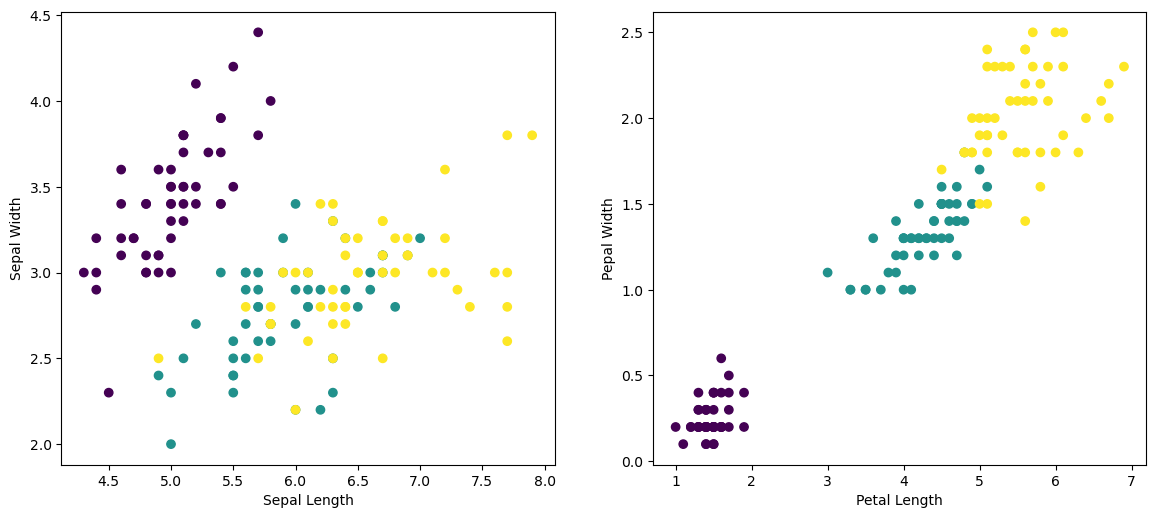

In [181]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Pepal Width')

**Nhận xét:**

TODO:

* **Tên các loài hoa**:
  * *Iris setosa* (tím)
  * *Iris versicolor* (xanh ngọc)
  * *Iris virginica* (vàng)
<br></br>
* **Trong đài hoa (*Sepal*)**:
  * Có sự trộn lẫn giữa kích thước đài hoa của *versicolor* và *virginica* &rarr; **khó phân cụm** dựa trên các thuộc tính này.
  * Riêng loài *setosa* có một mẫu nhiễu nổi bật ở [4.5, 2.3].
* **Trong cánh hoa (*Petal*)**:
  * Kích thước cánh hoa của loài *setosa* khác biệt gần như hoàn toàn so với *versicolor* và *virginica*. Còn *single-linkage* giữa 2 loài đó (*versicolor* và *virginica*) thì lại rất nhỏ, song lại có tâm rời nhau nên việc phân cụm dựa trên 2 thuộc tính này tương đối **dễ dàng hơn**.

In [182]:
D=X[:,2:]
model=k_means(k=3)
centers = model.fit(D)
print(centers)

[[4.29259259 1.35925926]
 [5.62608696 2.04782609]
 [1.462      0.246     ]]


Text(0.5, 1.0, 'Predicted')

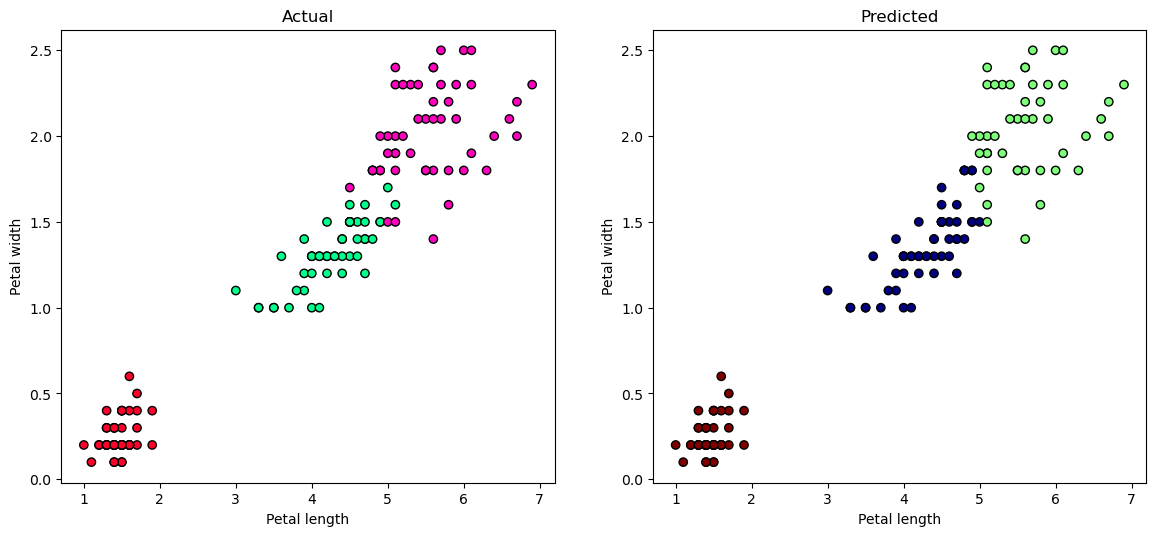

In [183]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

TODO:
- Trong một số lần chạy, sai lệch là rất lớn, đôi khi khiến một trong 2 loài *versicolor* hay *virginica* chiếm rất nhiều mà phần còn lại chiếm rất ít. Điều này là do việc chọn ngẫu nhiên các *centroids* khi *init* thuật toán. Đây cũng chính là một trong những điểm yếu lớn nhất của thuật toán này.
- Khi các k được chia đều, thuật toán phân cụm rất tốt. Tuy có ít mẫu bị đánh giá sai nhưng việc đánh giá sai nhiễu là không thể tránh khỏi.

### Thực hiện tương tự với thuật toán K-medoids

219.33717064631782
60.76834211891143
55.26253865871136
54.94702499399745
[[5.6 2.1]
 [4.4 1.4]
 [1.4 0.2]]


Text(0.5, 1.0, 'Predicted')

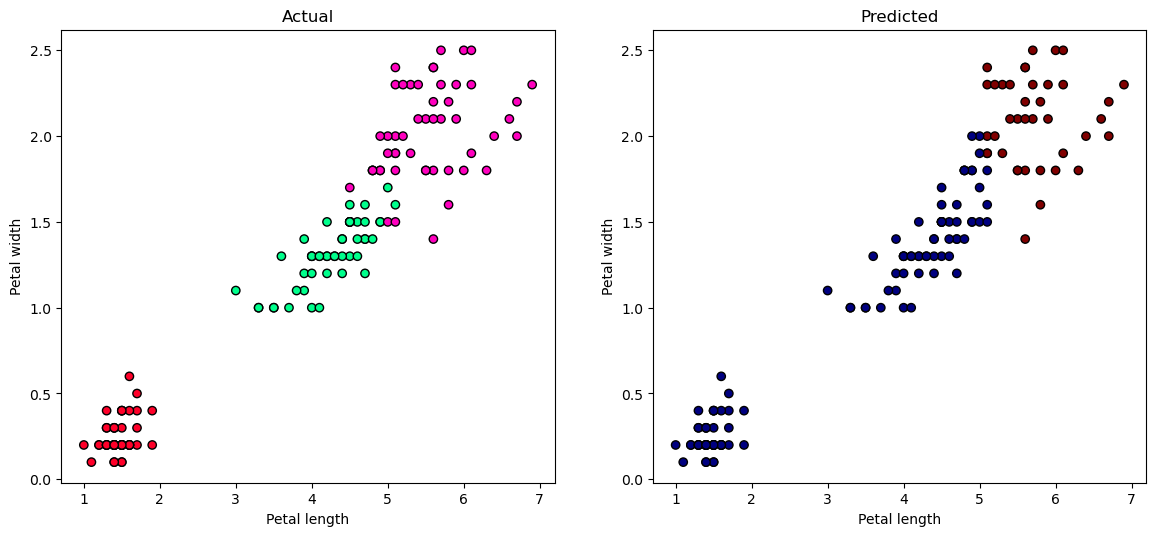

In [184]:
#TODO
model4=k_medoids(k=3)
centers = model4.fit(D)
print(centers)

new_labels = model2.predict(D)
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')